In [5]:
import numpy as np
def prof(h):
    f1 = np.arcsin(h)
    f2 = h*(1-h**2)**(0.5)
    f3 = 0.5*np.pi-1.24
    return f1+f2-f3

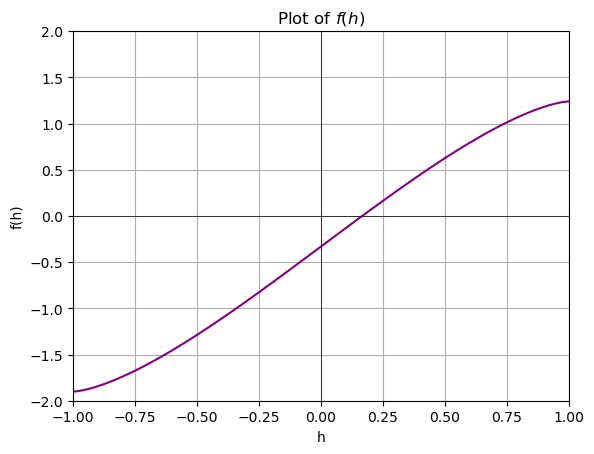

In [7]:
import matplotlib.pyplot as plt
# Generate x values
x = np.linspace(-1, 1, 100)

# Calculate y values
y = prof(x)
# Plot the equation
plt.plot(x, y, label = '$f(h)$', color = 'purple')
plt.xlabel('h')
plt.ylabel('f(h)')
plt.title('Plot of $f(h)$')
ax = plt.gca()
ax.set_ylim([-2, 2])
ax.set_xlim([-1, 1])
plt.grid(True)
# Marca los ejes coordenados
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

In [9]:
from typing import Callable
def sign(x: float) -> int:
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

In [11]:
def bisection(
    a: float, b: float, *, equation: Callable[[float], float], tol: float, N: int
) -> tuple[float, float, float, int] | None:
    i = 1
    assert a < b, "a not lower than b, the interval is not valid."

    assert (equation(a) * equation(b) < 0), "The function does not change sign over the interval."

    Fa = equation(a)
    p = a # to avoid crash in i == 0.
    for i in range(1,N+1):
        p = a + (b - a) / 2
        FP = equation(p)
        if FP == 0 or (b - a) / 2 < tol:
            return p, a, b, i

        if sign(Fa) * sign(FP) > 0:
            a = p
            Fa = FP
        else:
            b = p
    print("Solución no encontrada, número de iteraciones insuficiente para la tolerancia dada.")

In [13]:
a = -1
b = 1
tol = 10**(-2)
result = bisection(a=a,b=b,equation=prof,tol=tol,N=20)
print("Al utilizar el rango ["+str(a)+","+str(b)+"], en la iteración n°: "+str(result[3])+" se encontró que la raíz de f(x)"+
      " dentro de la precisión de "+format(tol, ".0e")+ " es: "+str(result[0])) 

Al utilizar el rango [-1,1], en la iteración n°: 8 se encontró que la raíz de f(x) dentro de la precisión de 1e-02 es: 0.1640625
